This code simulates a simplified Morris-Lecar neuron model using a system of differential equations that relate to the electrical potential of the neuron's membrane. The code initializes the model's parameters, solves the differential equations using the ode45 solver from MATLAB, and plots various properties of the model's behavior over time, including the voltage, activation variable, gating variable, and nullclines. The code varies the applied current and plots the resulting behavior in a series of subplots to show how the neuron's behavior changes as a function of the applied current.

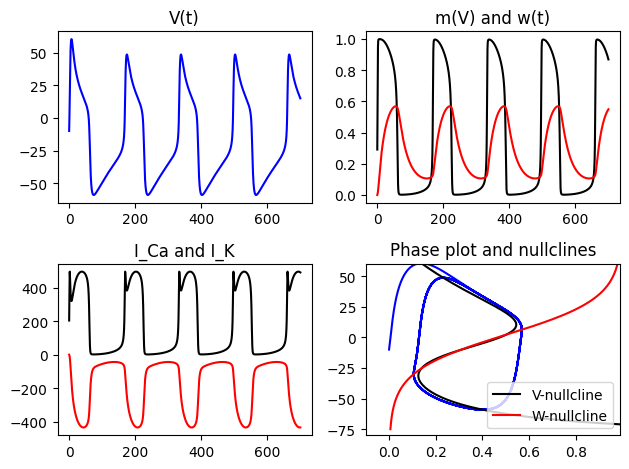

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import nolds

V1, V2, V3, V4 = -2, 18, 2, 30
gCa, gK, gL = 5.4, 8, 2
VCa, VK, VL = 120, -84, -60
C, Iapp = 20, 0

minf = lambda V: (1 + np.tanh((V-V1)/V2) )/2
winf = lambda V: (1 + np.tanh((V-V3)/V4) )/2
r = lambda V: np.cosh((V-V3)/(2*V4)) /50

fig, axs = plt.subplots(2, 2)

for Iapp in range(80, 141, 140):
    def Itotal(y):
        V, w = y
        return -gCa*minf(V)*(V-VCa) - gK*w*(V-VK) - gL*(V-VL) + Iapp

    def f(y, t):
        V, w = y
        return [Itotal(y)/C, r(V)*(winf(V)-w)]

    t = np.linspace(0, 700, 7000)
    IC = [-10, 0]
    Y = odeint(f, IC, t)

    # plt.figure(figsize=(10, 10))
    # plt.subplot(3, 2, 2)
    axs[0, 0].plot(t, Y[:, 0], 'b-', linewidth=1.5)
    axs[0, 0].set_title('V(t)')

    axs[0, 1].plot(t, minf(Y[:, 0]), 'k-', linewidth=1.5)
    axs[0, 1].plot(t, Y[:, 1], 'r-', linewidth=1.5)
    axs[0, 1].set_title('m(V) and w(t)')

    axs[1, 0].plot(t, -gCa*minf(Y[:, 0])*(Y[:, 0]-VCa), 'k-')
    axs[1, 0].plot(t, -gK*Y[:, 1]*(Y[:, 0]-VK), 'r-')
    axs[1, 0].set_title('I_Ca and I_K')

    axs[1, 1].plot(Y[:, 1], Y[:, 0], 'b-', linewidth=1.5)
    vRange = np.arange(-75, 76)
    w = (-gCa*minf(vRange)*(vRange-VCa)-gL*(vRange-VL)+Iapp) / (gK*(vRange-VK))
    axs[1, 1].plot(w, vRange, 'k-', label='V-nullcline')
    axs[1, 1].plot(winf(vRange), vRange, 'r-', label='W-nullcline')
    axs[1, 1].set_xlim(-0.1, 0.99)
    axs[1, 1].set_ylim(-80, 60)
    axs[1, 1].legend()
    axs[1, 1].set_title('Phase plot and nullclines')
plt.tight_layout()
plt.show()

# Lyaponov Exponent

In [73]:
import nolds

nolds.lyap_r(Y[:, 0])

/home/kslote/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning:

signal has very low mean frequency, setting min_tsep = 1750



0.0011936372955271006